In [9]:
## Regressaão Linear

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from statsmodels.formula.api import logit
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler




In [10]:
# Importar todas as nossos 6 dataset com as inforamções do jogadores desde 2017 a 2022 para analisarmos 

fifa17 = pd.read_csv("CLEAN_FIFA17_official_data.csv")
fifa18 = pd.read_csv("CLEAN_FIFA18_official_data.csv")
fifa19 = pd.read_csv("CLEAN_FIFA19_official_data.csv")
fifa20 = pd.read_csv("CLEAN_FIFA20_official_data.csv")
fifa21 = pd.read_csv("CLEAN_FIFA21_official_data.csv")
fifa22 = pd.read_csv("CLEAN_FIFA22_official_data.csv")


In [11]:
# Adicionar a Coluna "Year" ao dataset
  
fifa17["Year"] = 2017
fifa18["Year"] = 2018
fifa19["Year"] = 2019
fifa20["Year"] = 2020
fifa21["Year"] = 2021
fifa22["Year"] = 2022

# Juntar os dados
df = pd.concat([fifa17,fifa18,fifa19,fifa20,fifa21,fifa22])
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Year_Joined,Year,Release Clause(£),DefensiveAwareness
0,0,176580,L. Suárez,29,https://cdn.sofifa.com/players/176/580/17_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,92,92,FC Barcelona,...,25.0,31.0,33.0,37.0,ST,88.0,2014,2017,NaN,NaN
1,1,178518,R. Nainggolan,28,https://cdn.sofifa.com/players/178/518/17_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,86,86,Roma,...,11.0,14.0,8.0,11.0,CDM,84.0,2014,2017,NaN,NaN
2,2,181872,A. Vidal,29,https://cdn.sofifa.com/players/181/872/17_60.png,Chile,https://cdn.sofifa.com/flags/cl.png,87,87,FC Bayern München,...,2.0,4.0,2.0,4.0,CDM,85.0,2015,2017,NaN,NaN
3,3,197445,D. Alaba,24,https://cdn.sofifa.com/players/197/445/17_60.png,Austria,https://cdn.sofifa.com/flags/at.png,86,89,FC Bayern München,...,7.0,14.0,15.0,9.0,LB,84.0,2010,2017,NaN,NaN
4,4,195864,P. Pogba,23,https://cdn.sofifa.com/players/195/864/17_60.png,France,https://cdn.sofifa.com/flags/fr.png,88,94,Manchester United,...,6.0,2.0,4.0,3.0,CAM,85.0,2016,2017,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,16705,240558,18 L. Clayton,17,https://cdn.sofifa.com/players/240/558/18_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,53,70,Cheltenham Town,...,54.0,52.0,50.0,59.0,GK,52.0,2016,2022,238000.0,48.019408
16706,16706,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,...,52.0,53.0,48.0,58.0,GK,53.0,2018,2022,279000.0,5.000000
16707,16707,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,...,48.0,45.0,38.0,52.0,GK,47.0,2021,2022,223000.0,21.000000
16708,16708,259646,A. Shaikh,18,https://cdn.sofifa.com/players/259/646/22_60.png,India,https://cdn.sofifa.com/flags/in.png,47,67,ATK Mohun Bagan FC,...,41.0,39.0,45.0,49.0,GK,47.0,2020,2022,259000.0,7.000000


In [12]:
# ver as colunas e o tipo de cada um 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104352 entries, 0 to 16709
Data columns (total 68 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                104352 non-null  int64  
 1   ID                        104352 non-null  int64  
 2   Name                      104352 non-null  object 
 3   Age                       104352 non-null  int64  
 4   Photo                     104352 non-null  object 
 5   Nationality               104352 non-null  object 
 6   Flag                      104352 non-null  object 
 7   Overall                   104352 non-null  int64  
 8   Potential                 104352 non-null  int64  
 9   Club                      104352 non-null  object 
 10  Club Logo                 104352 non-null  object 
 11  Value(£)                  104352 non-null  float64
 12  Wage(£)                   104352 non-null  float64
 13  Special                   104352 non-null  int64  

In [13]:
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Value(£),Wage(£),Special,International Reputation,Weak Foot,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,Year_Joined,Year,Release Clause(£),DefensiveAwareness
count,104352.000000,104352.000000,104352.000000,104352.000000,104352.000000,1.043520e+05,104352.000000,104352.000000,104352.00000,104352.000000,...,104352.000000,104352.000000,104352.000000,104352.000000,104352.000000,104352.000000,104352.000000,104352.000000,8.679200e+04,50922.000000
mean,8701.473886,216084.592293,24.799601,66.581398,71.844287,2.563820e+06,10572.154343,1612.387170,1.13213,2.964006,...,16.239133,16.041676,15.937998,16.062740,16.339160,66.722823,2017.162220,2019.463844,4.800912e+06,47.311517
std,5030.982592,34124.247057,4.809458,6.969051,6.010707,5.957011e+06,21789.056038,269.427424,0.42756,0.667260,...,17.393988,16.638305,16.323240,16.811369,17.677574,6.922013,2.624661,1.700189,1.173290e+07,19.448137
min,0.000000,2.000000,15.000000,28.000000,38.000000,0.000000e+00,0.000000,571.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,1990.000000,2017.000000,5.000000e+03,3.000000
25%,4347.750000,201353.750000,21.000000,62.000000,68.000000,3.500000e+05,2000.000000,1471.000000,1.00000,3.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,62.000000,2016.000000,2018.000000,7.310000e+05,31.000000
50%,8695.500000,223931.000000,24.000000,67.000000,72.000000,8.000000e+05,4000.000000,1648.000000,1.00000,3.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,67.000000,2017.000000,2019.000000,1.400000e+06,49.000000
75%,13043.250000,238450.000000,28.000000,71.000000,76.000000,2.200000e+06,10000.000000,1799.000000,1.00000,3.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,71.000000,2019.000000,2021.000000,3.600000e+06,63.000000
max,17942.000000,264704.000000,54.000000,94.000000,95.000000,1.940000e+08,575000.000000,2349.000000,5.00000,5.000000,...,91.000000,92.000000,95.000000,93.000000,93.000000,94.000000,2021.000000,2022.000000,3.735000e+08,94.000000


In [14]:
# Fazer uma contagem dos valores nulos que estão no dataset
val_null = df.isnull().sum()
val_null[val_null > 0].sort_values(ascending=False)

Loaned From           96509
DefensiveAwareness    53430
Marking               47402
Release Clause(£)     17560
Body Type                81
dtype: int64

In [15]:
# Ver a taxa de correlação entre Overall e os outros atributos

corr_overall = df.corr(numeric_only=True)['Overall'].sort_values(ascending=False)

corr_overall

Overall                     1.000000
Best Overall Rating         0.984953
Reactions                   0.858277
Composure                   0.679068
Potential                   0.639089
Special                     0.614554
Value(£)                    0.598603
Wage(£)                     0.585725
Release Clause(£)           0.566220
Vision                      0.507757
ShortPassing                0.505595
Age                         0.490710
International Reputation    0.490608
LongPassing                 0.490397
ShotPower                   0.484532
BallControl                 0.455664
Curve                       0.413977
LongShots                   0.413569
Aggression                  0.399000
Crossing                    0.393173
FKAccuracy                  0.386826
Volleys                     0.383278
Dribbling                   0.368603
Strength                    0.365282
Stamina                     0.362053
Positioning                 0.355337
HeadingAccuracy             0.338377
P

In [16]:
# Pegamos os que 20 features que mais tem compatibilidade com a feature alvo e removemos o "Overall" desse top 20

top_20 = corr_overall.nlargest(21).drop(["Overall"])
top_20

Best Overall Rating         0.984953
Reactions                   0.858277
Composure                   0.679068
Potential                   0.639089
Special                     0.614554
Value(£)                    0.598603
Wage(£)                     0.585725
Release Clause(£)           0.566220
Vision                      0.507757
ShortPassing                0.505595
Age                         0.490710
International Reputation    0.490608
LongPassing                 0.490397
ShotPower                   0.484532
BallControl                 0.455664
Curve                       0.413977
LongShots                   0.413569
Aggression                  0.399000
Crossing                    0.393173
FKAccuracy                  0.386826
Name: Overall, dtype: float64

In [17]:
"""
 Caracteristicas que não agregam ao objetivo a ser analisado - Melhores jogadores
 Caracteristicas como Best Overall Rating(Melhor classificalção geral) , Potencial Salário, Valor e Reputação. São dados que não trazem agregação
 de informação nesse caso e os que tem muito valores null
 Então é melhor remover esses atributos 
"""

excluir_features = ["Best Overall Rating","Potential","Value(£)","Wage(£)","Release Clause(£)","International Reputation"]

In [18]:
# Pegar as colunas das features mais correlacionandas ao nosso objetivo

features_ideais = []
for feature in top_20.index:
    if feature not in excluir_features:
        features_ideais.append(feature)
features_ideais 

['Reactions',
 'Composure',
 'Special',
 'Vision',
 'ShortPassing',
 'Age',
 'LongPassing',
 'ShotPower',
 'BallControl',
 'Curve',
 'LongShots',
 'Aggression',
 'Crossing',
 'FKAccuracy']

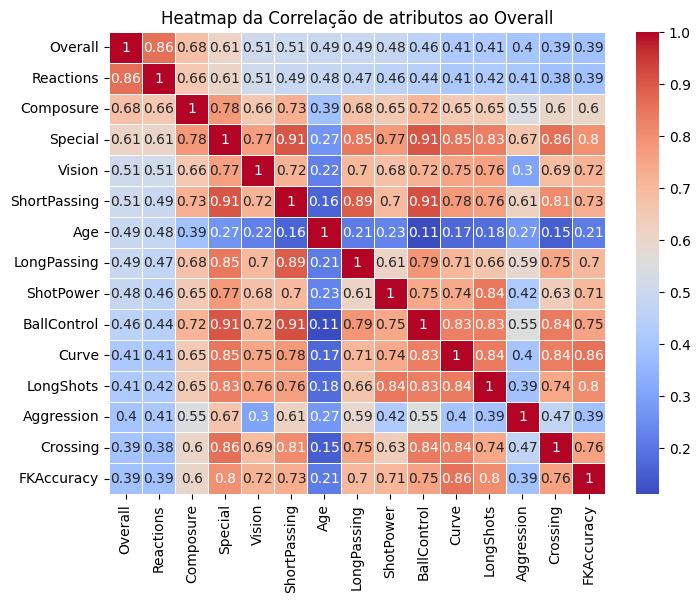

In [19]:
"""
Então fazendos um heatmap para ver se as features estão bem correlacionadas entre sí 
"""

# Colocamos o feature "Overall" devolta na nossas features para podermos fazer o heatmap
selected_attributes_overall = ['Overall'] + features_ideais
selected_attributes_overall_corr = df[selected_attributes_overall].corr()

# E Por fim plotamos o heatmap para os atributos relacionados com "Overall"
plt.figure(figsize=(8, 6))
sns.heatmap(selected_attributes_overall_corr, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Heatmap da Correlação de atributos ao Overall')
plt.show()

In [20]:
X = df[features_ideais]
y = df["Overall"]

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

## Regressão Linear

## Regressaão Linear

In [21]:
lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

# Calcular o MSE e o R2 para a Regressão Linear
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 10.251828259623124
R-squared: 0.7868400957567432


In [22]:
rf = RandomForestRegressor(n_estimators=100,oob_score=True, random_state=0)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Calcular o MSE e o R2 para o Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf,r2_rf

(3.037017789798086, 0.936853173418043)

# Gradiente Descendente


In [23]:
from sklearn.linear_model import SGDRegressor

sgd_regressor = SGDRegressor(random_state=42, alpha=0.003)
sgd_regressor.fit(X_train, y_train)

y_pred = sgd_regressor.predict(X_test)

# Calcular o MSE e o R2 para a GD
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 6.893728704177883e+26
R-squared: -1.4333702372376345e+25
